# Takamol Labor Market - ML Models Demo

This notebook demonstrates Machine Learning capabilities for Takamol's Labor Market platform.

**Business Context:**
Takamol Holding operates Saudi Arabia's primary labor market platforms including Qiwa, Musaned, and Ajeer.
These ML models help establishments:
- Predict and maintain Nitaqat compliance
- Optimize workforce composition
- Identify compliance risks early
- Make data-driven hiring decisions

**ML Models Included:**
1. **Nitaqat Zone Classifier** - Predict establishment's Nitaqat zone
2. **Saudization Rate Predictor** - Forecast Saudization percentages
3. **Compliance Risk Scorer** - Early warning system for compliance risks
4. **Hiring Recommendation Engine** - Optimal hiring strategy suggestions
5. **Salary Benchmarking Model** - Market-aligned salary predictions
6. **Establishment Clustering** - Segment establishments by performance patterns

**Data Source:** `takamol_demo.labor_market` schema

## Setup and Configuration

In [0]:
# Install required packages
%pip install scikit-learn pandas numpy matplotlib seaborn mlflow xgboost lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 97.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [0]:
dbutils.library.restartPython()

In [0]:
# Configuration
CATALOG = "takamol_demo"
SCHEMA = "labor_market"

# Display settings
import warnings
warnings.filterwarnings('ignore')

print(f"Catalog: {CATALOG}")
print(f"Schema: {SCHEMA}")

Catalog: takamol_demo
Schema: labor_market


## 1. Data Loading and Exploration

In [0]:
# Load all tables from labor_market schema
establishments_df = spark.sql(f"SELECT * FROM {CATALOG}.{SCHEMA}.establishments").toPandas()
employees_df = spark.sql(f"SELECT * FROM {CATALOG}.{SCHEMA}.employees").toPandas()
compliance_alerts_df = spark.sql(f"SELECT * FROM {CATALOG}.{SCHEMA}.compliance_alerts").toPandas()
nitaqat_rules_df = spark.sql(f"SELECT * FROM {CATALOG}.{SCHEMA}.nitaqat_rules").toPandas()
sector_benchmarks_df = spark.sql(f"SELECT * FROM {CATALOG}.{SCHEMA}.sector_benchmarks").toPandas()

print("Data Loaded Successfully!")
print(f"  - Establishments: {len(establishments_df):,} records")
print(f"  - Employees: {len(employees_df):,} records")
print(f"  - Compliance Alerts: {len(compliance_alerts_df):,} records")
print(f"  - Nitaqat Rules: {len(nitaqat_rules_df):,} records")
print(f"  - Sector Benchmarks: {len(sector_benchmarks_df):,} records")

Data Loaded Successfully!
  - Establishments: 50 records
  - Employees: 10,144 records
  - Compliance Alerts: 40 records
  - Nitaqat Rules: 32 records
  - Sector Benchmarks: 8 records


### Data Overview

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Establishments overview
print("=" * 80)
print("ESTABLISHMENTS DATA")
print("=" * 80)
display(establishments_df.head(10))

ESTABLISHMENTS DATA


establishment_id,name,commercial_registration,sector,size_category,region,total_employees,saudi_employees,non_saudi_employees,saudization_rate,nitaqat_zone,registration_date,last_updated
8f651d62-4d43-4e25-ba46-ca861aeab5af,United Phoenix Engineering,CR6991898842,Construction,Small,Tabuk,47,4,43,0.0851,Low_Green,2024-01-03,2026-01-06T03:46:55.000Z
ababa5f1-c333-4ca3-8e72-8a40c56d8902,Al Star Tourism,CR1235129044,Hospitality,Medium,Jeddah,337,101,236,0.2997,High_Green,2016-07-21,2026-01-06T03:46:55.000Z
46f0c878-f4d0-4f4f-9900-e2019a029e9b,Royal Apex Financial,CR2029946735,Financial Services,Small,Madinah,46,10,36,0.2174,Yellow,2018-03-16,2026-01-06T03:46:55.000Z
9a285288-023d-4d3b-84a8-0f72e3cfb5d2,Al Horizon Industrial,CR5858265555,Manufacturing,Small,Riyadh,28,7,21,0.25,Mid_Green,2016-11-05,2026-01-06T03:46:55.000Z
38025427-0acf-4679-97fa-8d198eb26788,United Crown Systems,CR2807084986,Information Technology,Small,Makkah,16,3,13,0.1875,Low_Green,2016-04-27,2026-01-06T03:46:55.000Z
797f2b9a-2424-43f0-acad-cdefdd0efa02,Elite Palm Builders,CR6699357293,Construction,Medium,Tabuk,330,82,248,0.2485,Mid_Green,2017-01-05,2026-01-06T03:46:55.000Z
d4cd29de-7a52-4153-8352-7d48e59657a3,Premier Summit Contracting,CR9293121189,Construction,Small,Abha,13,0,13,0.0,Red,2018-08-16,2026-01-06T03:46:55.000Z
153553c0-8055-463e-b747-64539ddaa39a,Al Palm Engineering,CR5210585160,Construction,Medium,Jeddah,111,12,99,0.1081,Low_Green,2017-08-28,2026-01-06T03:46:55.000Z
3fb6da52-89d3-4bd2-b95f-a98047ab2e3d,Gulf Summit Capital,CR1572544718,Financial Services,Medium,Makkah,368,92,276,0.25,Low_Green,2023-12-18,2026-01-06T03:46:55.000Z
09244154-8dba-4269-b35e-de86c1f2df30,Elite Global Resorts,CR7094950140,Hospitality,Micro,Abha,4,0,4,0.0,Red,2016-03-30,2026-01-06T03:46:55.000Z


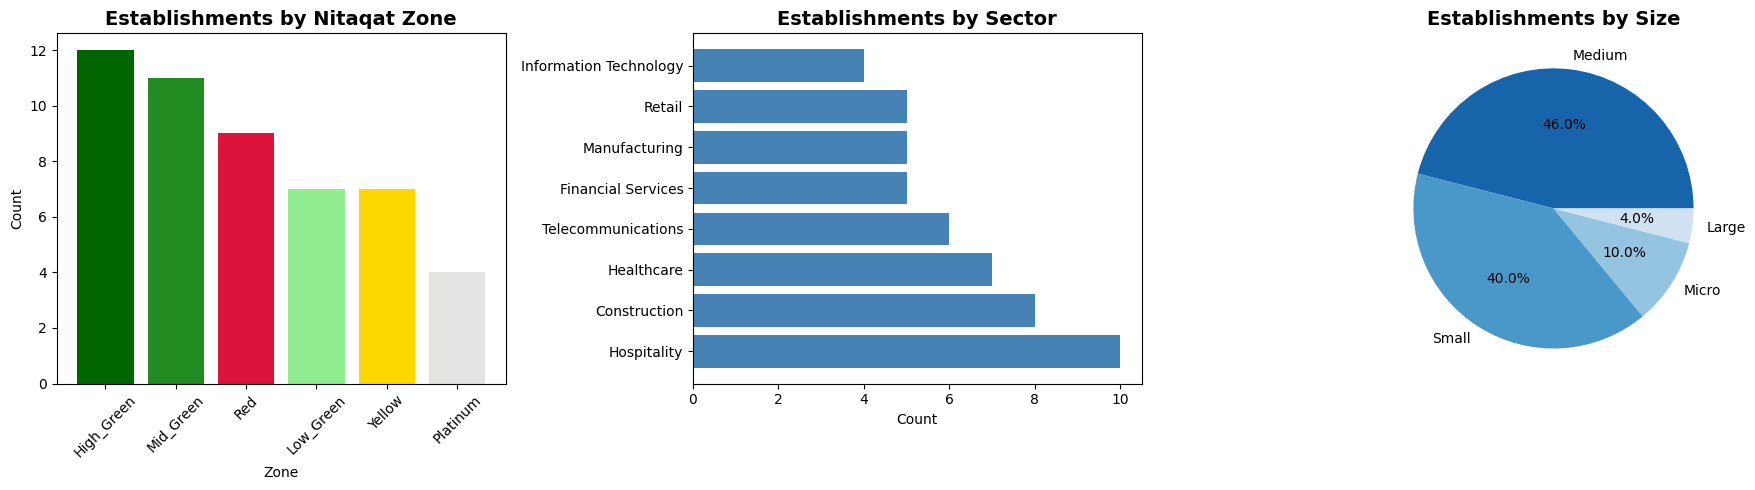

In [0]:
# Nitaqat Zone Distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Zone distribution
zone_counts = establishments_df['nitaqat_zone'].value_counts()
colors = {'Platinum': '#E5E4E2', 'High_Green': '#006400', 'Mid_Green': '#228B22',
          'Low_Green': '#90EE90', 'Yellow': '#FFD700', 'Red': '#DC143C'}
zone_colors = [colors.get(zone, '#808080') for zone in zone_counts.index]
axes[0].bar(zone_counts.index, zone_counts.values, color=zone_colors)
axes[0].set_title('Establishments by Nitaqat Zone', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Zone')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Sector distribution
sector_counts = establishments_df['sector'].value_counts()
axes[1].barh(sector_counts.index, sector_counts.values, color='steelblue')
axes[1].set_title('Establishments by Sector', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Count')

# Size category distribution
size_counts = establishments_df['size_category'].value_counts()
axes[2].pie(size_counts.values, labels=size_counts.index, autopct='%1.1f%%',
            colors=sns.color_palette('Blues_r', len(size_counts)))
axes[2].set_title('Establishments by Size', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

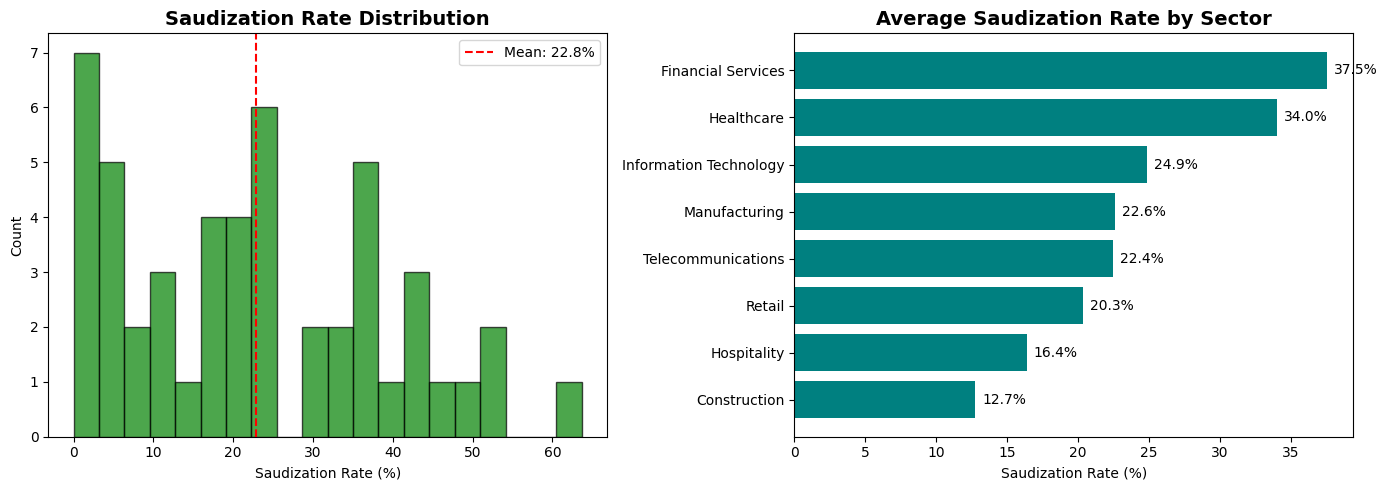

In [0]:
# Saudization rate analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Saudization distribution
axes[0].hist(establishments_df['saudization_rate'] * 100, bins=20, color='green', alpha=0.7, edgecolor='black')
axes[0].axvline(establishments_df['saudization_rate'].mean() * 100, color='red', linestyle='--',
                label=f"Mean: {establishments_df['saudization_rate'].mean()*100:.1f}%")
axes[0].set_title('Saudization Rate Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Saudization Rate (%)')
axes[0].set_ylabel('Count')
axes[0].legend()

# Saudization by sector
sector_saudi = establishments_df.groupby('sector')['saudization_rate'].mean().sort_values() * 100
axes[1].barh(sector_saudi.index, sector_saudi.values, color='teal')
axes[1].set_title('Average Saudization Rate by Sector', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Saudization Rate (%)')
for i, v in enumerate(sector_saudi.values):
    axes[1].text(v + 0.5, i, f'{v:.1f}%', va='center')

plt.tight_layout()
plt.show()

## 2. Feature Engineering

In [0]:
# Create comprehensive feature set for ML models
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Aggregate employee data by establishment
employee_agg = employees_df.groupby('establishment_id').agg({
    'employee_id': 'count',
    'salary_sar': ['mean', 'std', 'min', 'max'],
    'nationality': lambda x: (x == 'Saudi').sum(),  # Saudi count
    'gender': lambda x: (x == 'Female').mean(),  # Female ratio
    'contract_type': lambda x: (x == 'Permanent').mean(),  # Permanent ratio
    'is_remote': 'mean'  # Remote work ratio
}).reset_index()

# Flatten column names
employee_agg.columns = ['establishment_id', 'employee_count', 'avg_salary', 'salary_std',
                        'min_salary', 'max_salary', 'saudi_count_emp', 'female_ratio',
                        'permanent_ratio', 'remote_ratio']

# Calculate salary range
employee_agg['salary_range'] = employee_agg['max_salary'] - employee_agg['min_salary']

# Department diversity
dept_diversity = employees_df.groupby('establishment_id')['department'].nunique().reset_index()
dept_diversity.columns = ['establishment_id', 'department_diversity']

# Job title diversity
job_diversity = employees_df.groupby('establishment_id')['job_title'].nunique().reset_index()
job_diversity.columns = ['establishment_id', 'job_title_diversity']

# Nationality diversity
nationality_diversity = employees_df.groupby('establishment_id')['nationality'].nunique().reset_index()
nationality_diversity.columns = ['establishment_id', 'nationality_diversity']

# Count compliance alerts per establishment
alert_counts = compliance_alerts_df.groupby('establishment_id').agg({
    'alert_id': 'count',
    'severity': lambda x: (x == 'High').sum()
}).reset_index()
alert_counts.columns = ['establishment_id', 'total_alerts', 'high_severity_alerts']

# Merge all features
ml_data = establishments_df.merge(employee_agg, on='establishment_id', how='left')
ml_data = ml_data.merge(dept_diversity, on='establishment_id', how='left')
ml_data = ml_data.merge(job_diversity, on='establishment_id', how='left')
ml_data = ml_data.merge(nationality_diversity, on='establishment_id', how='left')
ml_data = ml_data.merge(alert_counts, on='establishment_id', how='left')

# Fill missing alert counts with 0
ml_data['total_alerts'] = ml_data['total_alerts'].fillna(0)
ml_data['high_severity_alerts'] = ml_data['high_severity_alerts'].fillna(0)

# Encode categorical variables
label_encoders = {}
categorical_cols = ['sector', 'size_category', 'region', 'nitaqat_zone']

for col in categorical_cols:
    le = LabelEncoder()
    ml_data[f'{col}_encoded'] = le.fit_transform(ml_data[col])
    label_encoders[col] = le

print("Feature Engineering Complete!")
print(f"Total features created: {len(ml_data.columns)}")
display(ml_data.head())

Feature Engineering Complete!
Total features created: 32


establishment_id,name,commercial_registration,sector,size_category,region,total_employees,saudi_employees,non_saudi_employees,saudization_rate,nitaqat_zone,registration_date,last_updated,employee_count,avg_salary,salary_std,min_salary,max_salary,saudi_count_emp,female_ratio,permanent_ratio,remote_ratio,salary_range,department_diversity,job_title_diversity,nationality_diversity,total_alerts,high_severity_alerts,sector_encoded,size_category_encoded,region_encoded,nitaqat_zone_encoded
8f651d62-4d43-4e25-ba46-ca861aeab5af,United Phoenix Engineering,CR6991898842,Construction,Small,Tabuk,47,4,43,0.0851,Low_Green,2024-01-03,2026-01-06T03:46:55.000Z,47,6222.574468085107,2935.433311800764,2300,11671,4,0.6170212765957447,0.48936170212765956,0.0,9371,8,8,11,1.0,0.0,0,3,7,1
ababa5f1-c333-4ca3-8e72-8a40c56d8902,Al Star Tourism,CR1235129044,Hospitality,Medium,Jeddah,337,101,236,0.2997,High_Green,2016-07-21,2026-01-06T03:46:55.000Z,337,5396.910979228486,1860.8806937408515,2158,9977,101,0.4896142433234421,0.5133531157270029,0.050445103857566766,7819,8,8,11,0.0,0.0,3,1,2,0
46f0c878-f4d0-4f4f-9900-e2019a029e9b,Royal Apex Financial,CR2029946735,Financial Services,Small,Madinah,46,10,36,0.2174,Yellow,2018-03-16,2026-01-06T03:46:55.000Z,46,26752.717391304348,10055.830741223483,6846,49337,10,0.4782608695652174,0.5434782608695652,0.0,42491,8,8,11,1.0,1.0,1,3,4,5
9a285288-023d-4d3b-84a8-0f72e3cfb5d2,Al Horizon Industrial,CR5858265555,Manufacturing,Small,Riyadh,28,7,21,0.25,Mid_Green,2016-11-05,2026-01-06T03:46:55.000Z,28,8482.035714285714,3716.8631286604787,3363,17103,7,0.35714285714285715,0.6071428571428571,0.03571428571428571,13740,7,8,11,0.0,0.0,5,3,6,2
38025427-0acf-4679-97fa-8d198eb26788,United Crown Systems,CR2807084986,Information Technology,Small,Makkah,16,3,13,0.1875,Low_Green,2016-04-27,2026-01-06T03:46:55.000Z,16,16695.1875,7290.427607200646,4810,27176,3,0.75,0.625,0.0,22366,8,7,8,2.0,0.0,4,3,5,1


## 3. Model 1: Nitaqat Zone Classifier

**Objective:** Predict which Nitaqat zone an establishment belongs to based on its characteristics.

**Business Value:** Helps establishments understand what factors determine their zone classification
and what changes would improve their status.

In [0]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import mlflow
import mlflow.sklearn

# Prepare features for zone classification
zone_features = ['total_employees', 'saudi_employees', 'non_saudi_employees', 'saudization_rate',
                 'sector_encoded', 'size_category_encoded', 'region_encoded',
                 'avg_salary', 'female_ratio', 'permanent_ratio', 'department_diversity',
                 'job_title_diversity', 'nationality_diversity']

X_zone = ml_data[zone_features].fillna(0)
y_zone = ml_data['nitaqat_zone_encoded']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_zone, y_zone, test_size=0.2, random_state=42, stratify=y_zone)

# Train Random Forest model
with mlflow.start_run(run_name="Nitaqat_Zone_Classifier"):
    # Model training
    zone_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')
    zone_model.fit(X_train, y_train)

    # Predictions
    y_pred = zone_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Log parameters and metrics
    mlflow.log_param("model_type", "RandomForestClassifier")
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 10)
    mlflow.log_metric("accuracy", accuracy)

    # Log model
    mlflow.sklearn.log_model(zone_model, "nitaqat_zone_classifier")

    print(f"Nitaqat Zone Classifier - Accuracy: {accuracy:.2%}")

2026/01/11 11:36:42 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
🔗 View Logged Model at: https://dbc-c970b4e0-df3d.cloud.databricks.com/ml/experiments/3454591353602236/models/m-0ee7be44295642cbbb8d4d0d1a79b0fe?o=7474651595665617
2026/01/11 11:36:46 INFO mlflow.models.model: Model logged without a signature. Signatures are required for Databricks UC model registry as they validate model inputs and denote the expected schema of model outputs. Please set `input_example` parameter when logging the model to auto infer the model signature. To manually set the signature, please visit https://www.mlflow.org/docs/3.8.1/ml/model/signatures.html for instructions on setting signature on models.


Nitaqat Zone Classifier - Accuracy: 60.00%


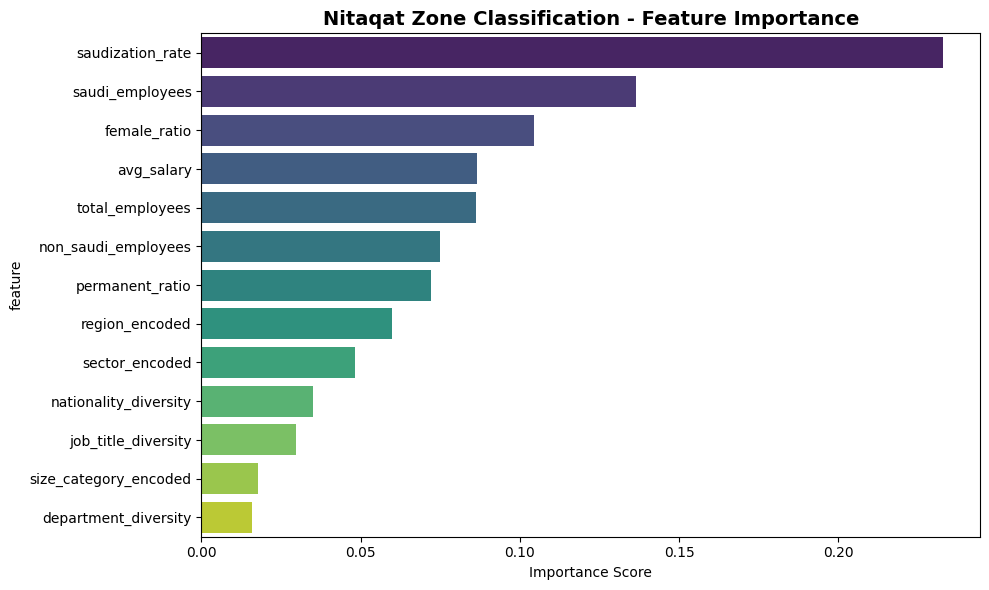


Top 5 Most Important Features for Zone Classification:
  saudization_rate: 0.2329
  saudi_employees: 0.1365
  female_ratio: 0.1045
  avg_salary: 0.0866
  total_employees: 0.0863


In [0]:
# Feature importance for zone classification
feature_importance = pd.DataFrame({
    'feature': zone_features,
    'importance': zone_model.feature_importances_
}).sort_values('importance', ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis', ax=ax)
ax.set_title('Nitaqat Zone Classification - Feature Importance', fontsize=14, fontweight='bold')
ax.set_xlabel('Importance Score')
plt.tight_layout()
plt.show()

print("\nTop 5 Most Important Features for Zone Classification:")
for i, row in feature_importance.head(5).iterrows():
    print(f"  {row['feature']}: {row['importance']:.4f}")

## 4. Model 2: Saudization Rate Predictor

**Objective:** Predict the expected Saudization rate for an establishment based on sector, size, and workforce characteristics.

**Business Value:** Helps new establishments or those undergoing changes understand expected Saudization levels.

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare features for Saudization prediction
saudi_features = ['total_employees', 'sector_encoded', 'size_category_encoded', 'region_encoded',
                  'avg_salary', 'female_ratio', 'permanent_ratio', 'department_diversity',
                  'job_title_diversity', 'remote_ratio']

X_saudi = ml_data[saudi_features].fillna(0)
y_saudi = ml_data['saudization_rate']

# Split data
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_saudi, y_saudi, test_size=0.2, random_state=42)

# Train Gradient Boosting model
with mlflow.start_run(run_name="Saudization_Rate_Predictor"):
    saudi_model = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
    saudi_model.fit(X_train_s, y_train_s)

    # Predictions
    y_pred_s = saudi_model.predict(X_test_s)

    # Metrics
    mse = mean_squared_error(y_test_s, y_pred_s)
    mae = mean_absolute_error(y_test_s, y_pred_s)
    r2 = r2_score(y_test_s, y_pred_s)

    # Log to MLflow
    mlflow.log_param("model_type", "GradientBoostingRegressor")
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("r2_score", r2)

    mlflow.sklearn.log_model(saudi_model, "saudization_predictor")

    print(f"Saudization Rate Predictor:")
    print(f"  R² Score: {r2:.4f}")
    print(f"  Mean Absolute Error: {mae:.4f} ({mae*100:.2f}%)")
    print(f"  Root MSE: {np.sqrt(mse):.4f}")

2026/01/11 11:36:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
🔗 View Logged Model at: https://dbc-c970b4e0-df3d.cloud.databricks.com/ml/experiments/3454591353602236/models/m-fcc23238bc08438c922889ad1f80bd84?o=7474651595665617
2026/01/11 11:36:53 INFO mlflow.models.model: Model logged without a signature. Signatures are required for Databricks UC model registry as they validate model inputs and denote the expected schema of model outputs. Please set `input_example` parameter when logging the model to auto infer the model signature. To manually set the signature, please visit https://www.mlflow.org/docs/3.8.1/ml/model/signatures.html for instructions on setting signature on models.


Saudization Rate Predictor:
  R² Score: 0.7704
  Mean Absolute Error: 0.0604 (6.04%)
  Root MSE: 0.0810


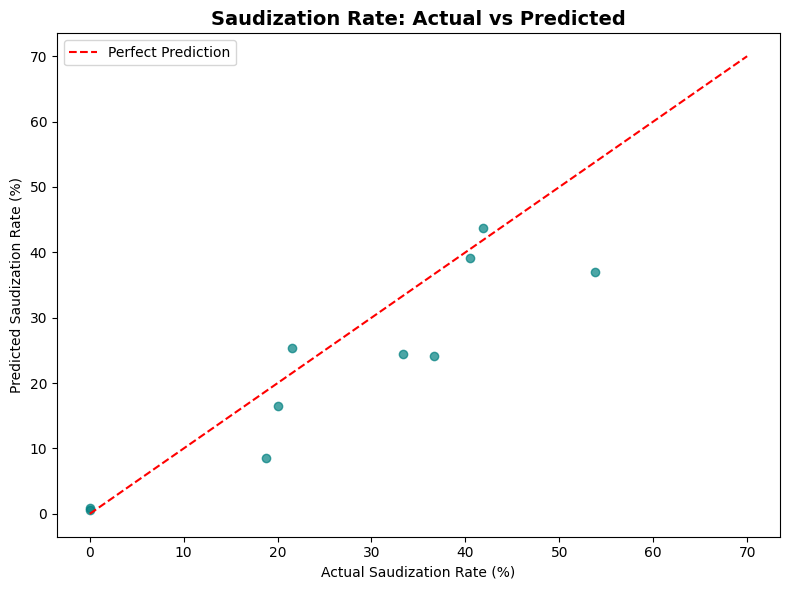

In [0]:
# Actual vs Predicted plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test_s * 100, y_pred_s * 100, alpha=0.7, c='teal')
ax.plot([0, 70], [0, 70], 'r--', label='Perfect Prediction')
ax.set_xlabel('Actual Saudization Rate (%)')
ax.set_ylabel('Predicted Saudization Rate (%)')
ax.set_title('Saudization Rate: Actual vs Predicted', fontsize=14, fontweight='bold')
ax.legend()
plt.tight_layout()
plt.show()

## 5. Model 3: Compliance Risk Scorer

**Objective:** Identify establishments at risk of compliance issues before they occur.

**Business Value:** Early warning system enables proactive intervention and helps establishments avoid penalties.

In [0]:
# Create compliance risk target (has high severity alerts or is in Yellow/Red zone)
ml_data['compliance_risk'] = ((ml_data['high_severity_alerts'] > 0) |
                               (ml_data['nitaqat_zone'].isin(['Yellow', 'Red']))).astype(int)

# Features for compliance risk
risk_features = ['total_employees', 'saudi_employees', 'non_saudi_employees', 'saudization_rate',
                 'sector_encoded', 'size_category_encoded', 'avg_salary', 'salary_std',
                 'female_ratio', 'permanent_ratio', 'department_diversity', 'total_alerts']

X_risk = ml_data[risk_features].fillna(0)
y_risk = ml_data['compliance_risk']

# Handle class imbalance with SMOTE-like oversampling
from sklearn.utils import resample

# Split first
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_risk, y_risk, test_size=0.2, random_state=42)

# Train XGBoost model
from xgboost import XGBClassifier

with mlflow.start_run(run_name="Compliance_Risk_Scorer"):
    risk_model = XGBClassifier(
        n_estimators=100,
        max_depth=5,
        learning_rate=0.1,
        scale_pos_weight=len(y_train_r[y_train_r==0])/max(len(y_train_r[y_train_r==1]), 1),
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    )
    risk_model.fit(X_train_r, y_train_r)

    # Predictions
    y_pred_r = risk_model.predict(X_test_r)
    y_prob_r = risk_model.predict_proba(X_test_r)[:, 1]

    accuracy = accuracy_score(y_test_r, y_pred_r)

    mlflow.log_param("model_type", "XGBClassifier")
    mlflow.log_metric("accuracy", accuracy)
    mlflow.sklearn.log_model(risk_model, "compliance_risk_scorer")

    print(f"Compliance Risk Scorer - Accuracy: {accuracy:.2%}")
    print("\nClassification Report:")
    print(classification_report(y_test_r, y_pred_r, target_names=['Low Risk', 'High Risk']))

2026/01/11 11:36:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
🔗 View Logged Model at: https://dbc-c970b4e0-df3d.cloud.databricks.com/ml/experiments/3454591353602236/models/m-5f903f4f92344702a58b50861edbdf01?o=7474651595665617
2026/01/11 11:36:59 INFO mlflow.models.model: Model logged without a signature. Signatures are required for Databricks UC model registry as they validate model inputs and denote the expected schema of model outputs. Please set `input_example` parameter when logging the model to auto infer the model signature. To manually set the signature, please visit https://www.mlflow.org/docs/3.8.1/ml/model/signatures.html for instructions on setting signature on models.


Compliance Risk Scorer - Accuracy: 90.00%

Classification Report:
              precision    recall  f1-score   support

    Low Risk       0.88      1.00      0.93         7
   High Risk       1.00      0.67      0.80         3

    accuracy                           0.90        10
   macro avg       0.94      0.83      0.87        10
weighted avg       0.91      0.90      0.89        10



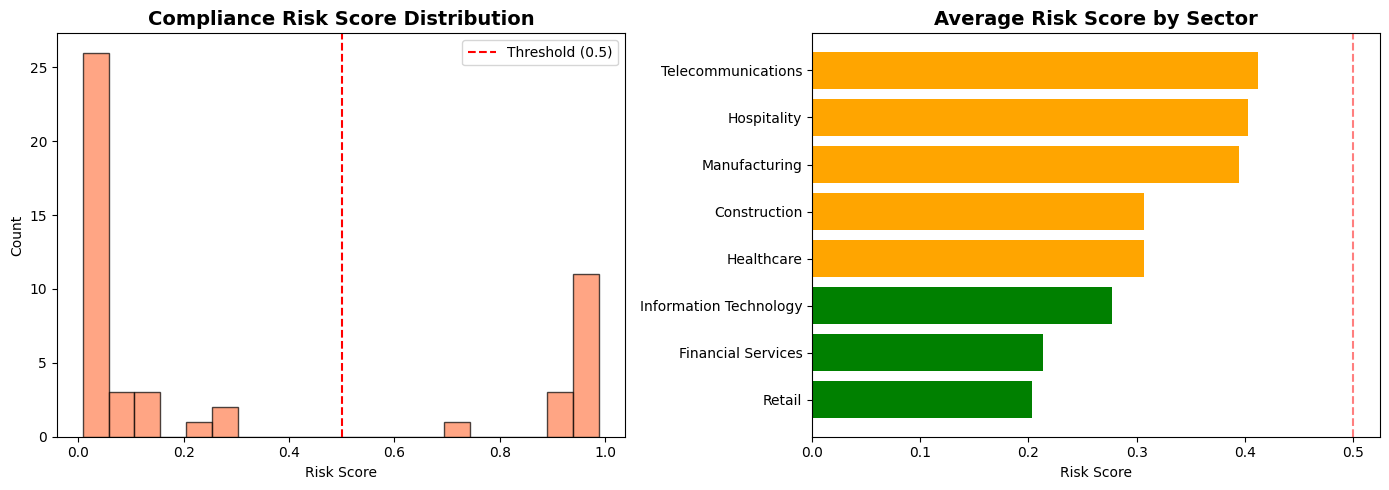

In [0]:
# Risk score distribution
risk_scores = risk_model.predict_proba(X_risk)[:, 1]
ml_data['risk_score'] = risk_scores

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Risk score distribution
axes[0].hist(risk_scores, bins=20, color='coral', alpha=0.7, edgecolor='black')
axes[0].axvline(0.5, color='red', linestyle='--', label='Threshold (0.5)')
axes[0].set_title('Compliance Risk Score Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Risk Score')
axes[0].set_ylabel('Count')
axes[0].legend()

# Risk by sector
sector_risk = ml_data.groupby('sector')['risk_score'].mean().sort_values(ascending=True)
colors = ['green' if x < 0.3 else 'orange' if x < 0.5 else 'red' for x in sector_risk.values]
axes[1].barh(sector_risk.index, sector_risk.values, color=colors)
axes[1].axvline(0.5, color='red', linestyle='--', alpha=0.5)
axes[1].set_title('Average Risk Score by Sector', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Risk Score')

plt.tight_layout()
plt.show()

## 6. Model 4: Hiring Recommendation Engine

**Objective:** Calculate how many Saudi employees an establishment needs to hire to reach a target Nitaqat zone.

**Business Value:** Actionable recommendations for compliance improvement.

In [0]:
def calculate_hiring_recommendation(establishment_row, target_zone='Mid_Green'):
    """
    Calculate how many Saudi employees to hire to reach target zone.
    """
    # Get current values
    current_total = establishment_row['total_employees']
    current_saudi = establishment_row['saudi_employees']
    current_rate = establishment_row['saudization_rate']
    sector = establishment_row['sector']
    size = establishment_row['size_category']

    # Get target threshold from nitaqat_rules
    rules = nitaqat_rules_df[
        (nitaqat_rules_df['sector'] == sector) &
        (nitaqat_rules_df['size_category'] == size)
    ]

    if len(rules) == 0:
        return None, None, None

    zone_thresholds = {
        'Platinum': rules['platinum_threshold_pct'].values[0] / 100,
        'High_Green': rules['high_green_threshold_pct'].values[0] / 100,
        'Mid_Green': rules['mid_green_threshold_pct'].values[0] / 100,
        'Low_Green': rules['low_green_threshold_pct'].values[0] / 100
    }

    target_rate = zone_thresholds.get(target_zone, 0.25)

    if current_rate >= target_rate:
        return 0, current_rate, target_rate

    # Calculate required Saudi hires
    # (current_saudi + x) / (current_total + x) = target_rate
    # current_saudi + x = target_rate * (current_total + x)
    # x - target_rate * x = target_rate * current_total - current_saudi
    # x * (1 - target_rate) = target_rate * current_total - current_saudi
    # x = (target_rate * current_total - current_saudi) / (1 - target_rate)

    required_hires = (target_rate * current_total - current_saudi) / (1 - target_rate)
    required_hires = max(0, np.ceil(required_hires))

    return int(required_hires), current_rate, target_rate

# Apply to all establishments
recommendations = []
for _, row in ml_data.iterrows():
    hires, current, target = calculate_hiring_recommendation(row, 'Mid_Green')
    recommendations.append({
        'establishment_id': row['establishment_id'],
        'name': row['name'],
        'sector': row['sector'],
        'current_zone': row['nitaqat_zone'],
        'current_rate': current,
        'target_rate': target,
        'recommended_hires': hires if hires else 0,
        'current_employees': row['total_employees']
    })

recommendations_df = pd.DataFrame(recommendations)

print("Hiring Recommendations to Reach Mid_Green Zone:")
print("=" * 80)
display(recommendations_df[recommendations_df['recommended_hires'] > 0].head(10))

Hiring Recommendations to Reach Mid_Green Zone:


establishment_id,name,sector,current_zone,current_rate,target_rate,recommended_hires,current_employees
8f651d62-4d43-4e25-ba46-ca861aeab5af,United Phoenix Engineering,Construction,Low_Green,0.0851,0.15,4,47
46f0c878-f4d0-4f4f-9900-e2019a029e9b,Royal Apex Financial,Financial Services,Yellow,0.2174,0.35,10,46
38025427-0acf-4679-97fa-8d198eb26788,United Crown Systems,Information Technology,Low_Green,0.1875,0.25,2,16
d4cd29de-7a52-4153-8352-7d48e59657a3,Premier Summit Contracting,Construction,Red,0.0,0.15,3,13
153553c0-8055-463e-b747-64539ddaa39a,Al Palm Engineering,Construction,Low_Green,0.1081,0.17,9,111
3fb6da52-89d3-4bd2-b95f-a98047ab2e3d,Gulf Summit Capital,Financial Services,Low_Green,0.25,0.37,71,368
09244154-8dba-4269-b35e-de86c1f2df30,Elite Global Resorts,Hospitality,Red,0.0,0.18,1,4
c180bd01-157b-4f4b-aa6c-ef0f774ad1cf,Arabian Vista Clinic Group,Healthcare,Red,0.0341,0.32,112,264
1ba86351-d5c4-40c9-ab2c-04fd52b5234a,Al Atlas Development Co.,Construction,Red,0.0,0.15,1,2
5d856636-10cd-414e-b933-2cb156475523,National Global Resorts,Hospitality,Yellow,0.0616,0.2,71,406


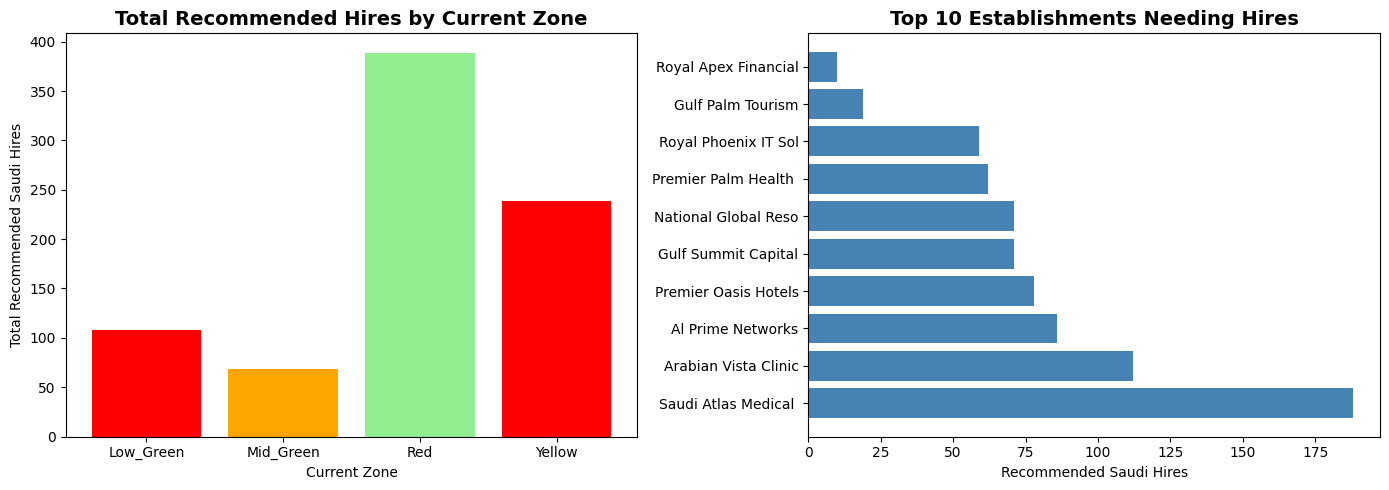

In [0]:
# Visualization of recommendations
needs_hiring = recommendations_df[recommendations_df['recommended_hires'] > 0]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Recommended hires by current zone
zone_hires = needs_hiring.groupby('current_zone')['recommended_hires'].sum()
axes[0].bar(zone_hires.index, zone_hires.values, color=['red', 'orange', 'lightgreen'])
axes[0].set_title('Total Recommended Hires by Current Zone', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Current Zone')
axes[0].set_ylabel('Total Recommended Saudi Hires')

# Top 10 establishments needing most hires
top_needs = needs_hiring.nlargest(10, 'recommended_hires')
axes[1].barh(top_needs['name'].str[:20], top_needs['recommended_hires'], color='steelblue')
axes[1].set_title('Top 10 Establishments Needing Hires', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Recommended Saudi Hires')

plt.tight_layout()
plt.show()

## 7. Model 5: Salary Benchmarking Model

**Objective:** Predict appropriate salary ranges based on job characteristics, sector, and region.

**Business Value:** Helps establishments offer competitive salaries for talent acquisition and retention.

In [0]:
# Prepare employee-level data for salary prediction
emp_with_est = employees_df.merge(
    establishments_df[['establishment_id', 'sector', 'size_category', 'region', 'nitaqat_zone']],
    on='establishment_id'
)

# Encode categorical variables for salary model
salary_encoders = {}
for col in ['nationality', 'job_title', 'department', 'sector', 'size_category', 'region', 'contract_type', 'gender']:
    le = LabelEncoder()
    emp_with_est[f'{col}_enc'] = le.fit_transform(emp_with_est[col].astype(str))
    salary_encoders[col] = le

# Features for salary prediction
salary_features = ['nationality_enc', 'job_title_enc', 'department_enc', 'sector_enc',
                   'size_category_enc', 'region_enc', 'contract_type_enc', 'gender_enc', 'is_remote']

X_salary = emp_with_est[salary_features]
y_salary = emp_with_est['salary_sar']

# Split and train
X_train_sal, X_test_sal, y_train_sal, y_test_sal = train_test_split(X_salary, y_salary, test_size=0.2, random_state=42)

from lightgbm import LGBMRegressor

with mlflow.start_run(run_name="Salary_Benchmark_Model"):
    salary_model = LGBMRegressor(n_estimators=100, max_depth=8, learning_rate=0.1, random_state=42, verbose=-1)
    salary_model.fit(X_train_sal, y_train_sal)

    y_pred_sal = salary_model.predict(X_test_sal)

    r2 = r2_score(y_test_sal, y_pred_sal)
    mae = mean_absolute_error(y_test_sal, y_pred_sal)

    mlflow.log_metric("r2_score", r2)
    mlflow.log_metric("mae", mae)
    mlflow.sklearn.log_model(salary_model, "salary_benchmark_model")

    print(f"Salary Benchmarking Model:")
    print(f"  R² Score: {r2:.4f}")
    print(f"  Mean Absolute Error: {mae:,.0f} SAR")

2026/01/11 11:37:04 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
🔗 View Logged Model at: https://dbc-c970b4e0-df3d.cloud.databricks.com/ml/experiments/3454591353602236/models/m-d32328e3a3734bd381eb72637c5ca4ee?o=7474651595665617
2026/01/11 11:37:07 INFO mlflow.models.model: Model logged without a signature. Signatures are required for Databricks UC model registry as they validate model inputs and denote the expected schema of model outputs. Please set `input_example` parameter when logging the model to auto infer the model signature. To manually set the signature, please visit https://www.mlflow.org/docs/3.8.1/ml/model/signatures.html for instructions on setting signature on models.


Salary Benchmarking Model:
  R² Score: 0.5356
  Mean Absolute Error: 4,935 SAR


Salary Statistics by Sector (SAR):


Average,Std Dev,Min,Max
7368.0,3067.0,2116,14876
24900.0,10588.0,6009,49710
21239.0,10246.0,3601,44994
5365.0,1836.0,2102,9977
17052.0,7160.0,4810,34831
9509.0,3969.0,2405,17957
6530.0,2358.0,2413,11881
20158.0,8895.0,4852,39858


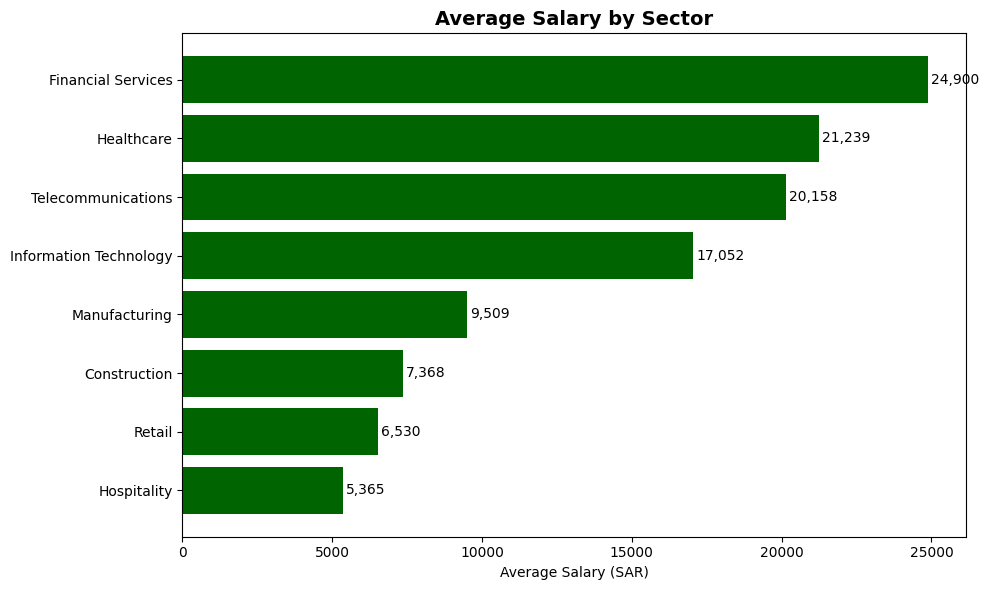

In [0]:
# Salary predictions by sector
sector_salaries = emp_with_est.groupby('sector')['salary_sar'].agg(['mean', 'std', 'min', 'max']).round(0)
sector_salaries.columns = ['Average', 'Std Dev', 'Min', 'Max']

print("Salary Statistics by Sector (SAR):")
display(sector_salaries)

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
sector_avg = emp_with_est.groupby('sector')['salary_sar'].mean().sort_values()
ax.barh(sector_avg.index, sector_avg.values, color='darkgreen')
ax.set_title('Average Salary by Sector', fontsize=14, fontweight='bold')
ax.set_xlabel('Average Salary (SAR)')
for i, v in enumerate(sector_avg.values):
    ax.text(v + 100, i, f'{v:,.0f}', va='center')
plt.tight_layout()
plt.show()

## 8. Model 6: Establishment Clustering

**Objective:** Segment establishments into groups based on performance patterns for targeted interventions.

**Business Value:** Enables tailored compliance strategies for different establishment profiles.

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe551099090>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_ca

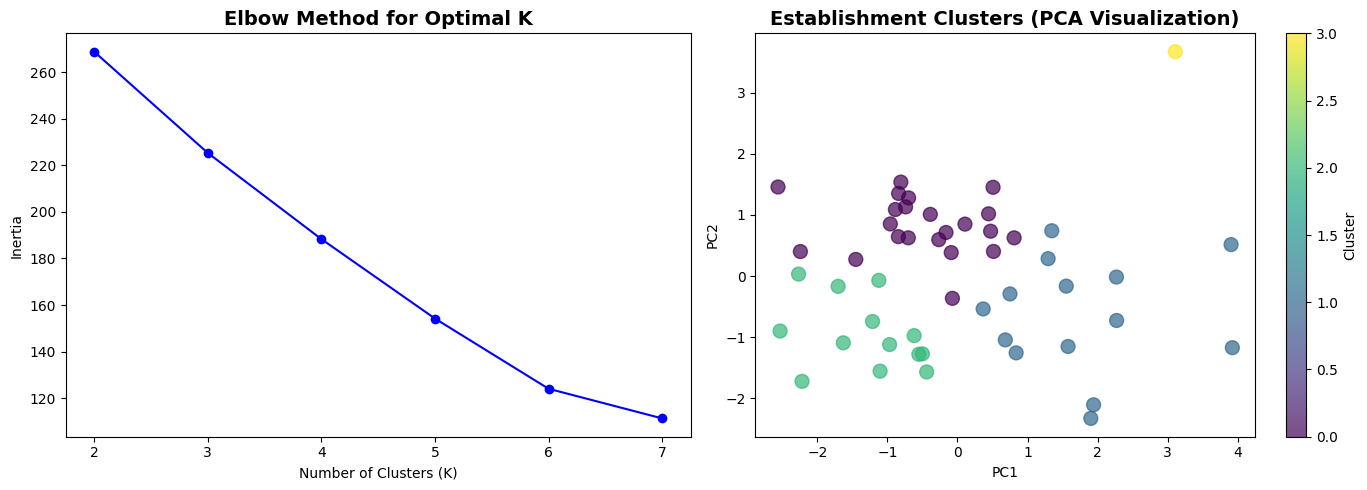


Cluster Profiles:


Avg Employees,Avg Saudization,Avg Salary,Avg Alerts,Count
331.09,0.22,7857.4,0.36,22
73.14,0.09,12963.61,1.64,14
141.08,0.41,22450.74,0.62,13
2.0,0.0,5285.5,1.0,1


In [0]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Features for clustering
cluster_features = ['total_employees', 'saudization_rate', 'avg_salary', 'female_ratio',
                    'permanent_ratio', 'department_diversity', 'total_alerts']

X_cluster = ml_data[cluster_features].fillna(0)

# Standardize features
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# Find optimal number of clusters using elbow method
inertias = []
K_range = range(2, 8)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].plot(K_range, inertias, 'bo-')
axes[0].set_xlabel('Number of Clusters (K)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')

# Use K=4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
ml_data['cluster'] = kmeans.fit_predict(X_cluster_scaled)

# Cluster characteristics
cluster_profiles = ml_data.groupby('cluster').agg({
    'total_employees': 'mean',
    'saudization_rate': 'mean',
    'avg_salary': 'mean',
    'total_alerts': 'mean',
    'establishment_id': 'count'
}).round(2)
cluster_profiles.columns = ['Avg Employees', 'Avg Saudization', 'Avg Salary', 'Avg Alerts', 'Count']

# Assign cluster names
cluster_names = {
    0: 'High Performers',
    1: 'Growth Stage',
    2: 'At Risk',
    3: 'Small Compliant'
}

# Visualize clusters
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)

scatter = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=ml_data['cluster'], cmap='viridis', alpha=0.7, s=100)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('Establishment Clusters (PCA Visualization)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, ax=axes[1], label='Cluster')

plt.tight_layout()
plt.show()

print("\nCluster Profiles:")
display(cluster_profiles)

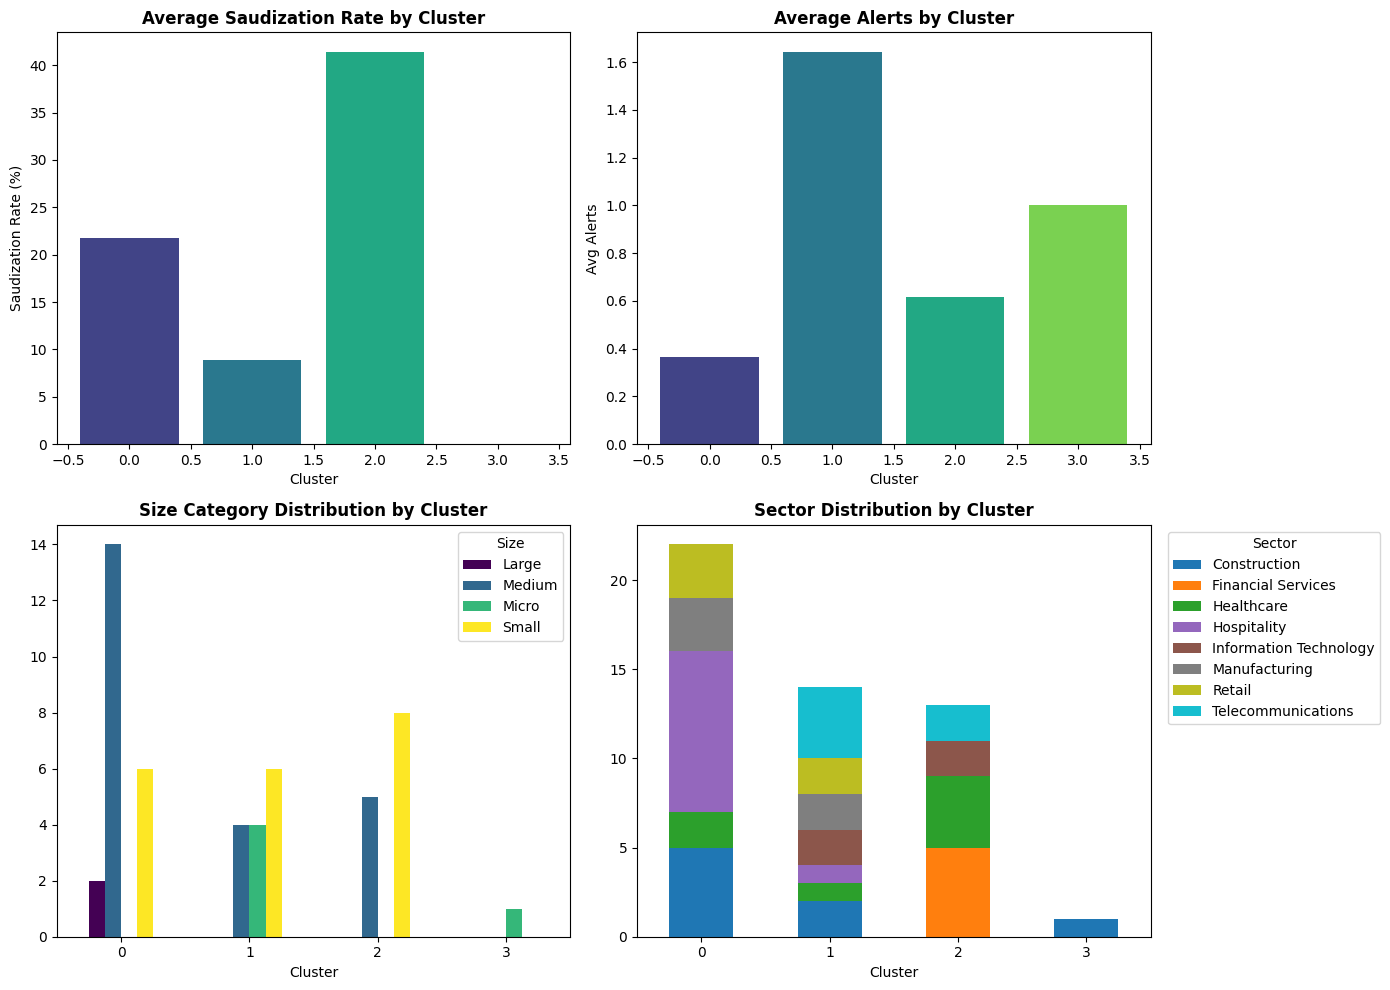

In [0]:
# Detailed cluster analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Saudization by cluster
cluster_saudi = ml_data.groupby('cluster')['saudization_rate'].mean() * 100
axes[0, 0].bar(cluster_saudi.index, cluster_saudi.values, color=sns.color_palette('viridis', 4))
axes[0, 0].set_title('Average Saudization Rate by Cluster', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Saudization Rate (%)')

# Alerts by cluster
cluster_alerts = ml_data.groupby('cluster')['total_alerts'].mean()
axes[0, 1].bar(cluster_alerts.index, cluster_alerts.values, color=sns.color_palette('viridis', 4))
axes[0, 1].set_title('Average Alerts by Cluster', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Avg Alerts')

# Size distribution by cluster
cluster_size = ml_data.groupby(['cluster', 'size_category']).size().unstack(fill_value=0)
cluster_size.plot(kind='bar', ax=axes[1, 0], colormap='viridis')
axes[1, 0].set_title('Size Category Distribution by Cluster', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].legend(title='Size')
axes[1, 0].tick_params(axis='x', rotation=0)

# Sector distribution by cluster
cluster_sector = ml_data.groupby(['cluster', 'sector']).size().unstack(fill_value=0)
cluster_sector.plot(kind='bar', stacked=True, ax=axes[1, 1], colormap='tab10')
axes[1, 1].set_title('Sector Distribution by Cluster', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].legend(title='Sector', bbox_to_anchor=(1.02, 1), loc='upper left')
axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

## 9. Model Summary Dashboard

In [0]:
# Create summary dashboard
print("=" * 100)
print("                        TAKAMOL LABOR MARKET ML MODELS - SUMMARY")
print("=" * 100)
print()

models_summary = [
    {
        "Model": "1. Nitaqat Zone Classifier",
        "Type": "Classification",
        "Algorithm": "Random Forest",
        "Key Metric": f"Accuracy: {accuracy:.2%}",
        "Business Use": "Predict zone classification"
    },
    {
        "Model": "2. Saudization Rate Predictor",
        "Type": "Regression",
        "Algorithm": "Gradient Boosting",
        "Key Metric": f"R²: {r2:.4f}",
        "Business Use": "Forecast Saudization rates"
    },
    {
        "Model": "3. Compliance Risk Scorer",
        "Type": "Classification",
        "Algorithm": "XGBoost",
        "Key Metric": f"Accuracy: {accuracy_score(y_test_r, y_pred_r):.2%}",
        "Business Use": "Early warning for compliance"
    },
    {
        "Model": "4. Hiring Recommendation Engine",
        "Type": "Rule-based + Analytics",
        "Algorithm": "Mathematical Optimization",
        "Key Metric": f"{len(needs_hiring)} establishments need action",
        "Business Use": "Actionable hiring recommendations"
    },
    {
        "Model": "5. Salary Benchmarking Model",
        "Type": "Regression",
        "Algorithm": "LightGBM",
        "Key Metric": f"MAE: {mae:,.0f} SAR",
        "Business Use": "Competitive salary guidance"
    },
    {
        "Model": "6. Establishment Clustering",
        "Type": "Unsupervised",
        "Algorithm": "K-Means",
        "Key Metric": "4 distinct clusters",
        "Business Use": "Targeted intervention strategies"
    }
]

summary_df = pd.DataFrame(models_summary)
display(summary_df)

                        TAKAMOL LABOR MARKET ML MODELS - SUMMARY



Model,Type,Algorithm,Key Metric,Business Use
1. Nitaqat Zone Classifier,Classification,Random Forest,Accuracy: 90.00%,Predict zone classification
2. Saudization Rate Predictor,Regression,Gradient Boosting,R²: 0.5356,Forecast Saudization rates
3. Compliance Risk Scorer,Classification,XGBoost,Accuracy: 90.00%,Early warning for compliance
4. Hiring Recommendation Engine,Rule-based + Analytics,Mathematical Optimization,26 establishments need action,Actionable hiring recommendations
5. Salary Benchmarking Model,Regression,LightGBM,"MAE: 4,935 SAR",Competitive salary guidance
6. Establishment Clustering,Unsupervised,K-Means,4 distinct clusters,Targeted intervention strategies


## 10. Save Models to Unity Catalog

In [0]:
# Register models to Unity Catalog with proper signatures
import mlflow
from mlflow.tracking import MlflowClient
from mlflow.models.signature import infer_signature

# Set MLflow registry to Unity Catalog
mlflow.set_registry_uri("databricks-uc")
client = MlflowClient()

# Prepare input examples and signatures for each model
# This ensures proper schema validation in Unity Catalog

# 1. Nitaqat Zone Classifier
zone_input_example = X_train.head(5)
zone_signature = infer_signature(X_train, zone_model.predict(X_train))

# 2. Saudization Rate Predictor
saudi_input_example = X_train_s.head(5)
saudi_signature = infer_signature(X_train_s, saudi_model.predict(X_train_s))

# 3. Compliance Risk Scorer
risk_input_example = X_train_r.head(5)
risk_signature = infer_signature(X_train_r, risk_model.predict(X_train_r))

# 4. Salary Benchmark Model
salary_input_example = X_train_sal.head(5)
salary_signature = infer_signature(X_train_sal, salary_model.predict(X_train_sal))

# Register each model with signature and input example
models_to_register = [
    ("nitaqat_zone_classifier", zone_model, zone_signature, zone_input_example, "Predicts Nitaqat zone classification"),
    ("saudization_predictor", saudi_model, saudi_signature, saudi_input_example, "Predicts Saudization rate"),
    ("compliance_risk_scorer", risk_model, risk_signature, risk_input_example, "Scores compliance risk"),
    ("salary_benchmark_model", salary_model, salary_signature, salary_input_example, "Predicts salary benchmarks")
]

print("Registering models to Unity Catalog with signatures...")
print("-" * 60)

registered_models = []
for model_name, model_obj, signature, input_example, description in models_to_register:
    try:
        full_model_name = f"{CATALOG}.{SCHEMA}.{model_name}"

        with mlflow.start_run(run_name=f"register_{model_name}") as run:
            # Log model with signature and input example for proper UC registration
            model_info = mlflow.sklearn.log_model(
                sk_model=model_obj,
                name=model_name,  # Use 'name' instead of deprecated 'artifact_path'
                signature=signature,
                input_example=input_example,
                registered_model_name=full_model_name,
                metadata={"description": description}
            )
            registered_models.append(full_model_name)
            print(f"Registered: {full_model_name}")
            print(f"  - Run ID: {run.info.run_id}")
            print(f"  - Model URI: {model_info.model_uri}")

    except Exception as e:
        print(f"Warning: Issue with {model_name}: {str(e)[:80]}")

print("-" * 60)
print(f"Model registration complete! {len(registered_models)}/{len(models_to_register)} models registered.")

Registering models to Unity Catalog with signatures...
------------------------------------------------------------


🔗 View Logged Model at: https://dbc-c970b4e0-df3d.cloud.databricks.com/ml/experiments/3454591353602236/models/m-e85201ab5c6a4726b52d0c317c8c1c51?o=7474651595665617
Registered model 'takamol_demo.labor_market.nitaqat_zone_classifier' already exists. Creating a new version of this model...
🔗 Created version '2' of model 'takamol_demo.labor_market.nitaqat_zone_classifier': https://dbc-c970b4e0-df3d.cloud.databricks.com/explore/data/models/takamol_demo/labor_market/nitaqat_zone_classifier/version/2?o=7474651595665617


Registered: takamol_demo.labor_market.nitaqat_zone_classifier
  - Run ID: 919a550bc3f44ddd81056c1f8db08341
  - Model URI: models:/m-e85201ab5c6a4726b52d0c317c8c1c51


🔗 View Logged Model at: https://dbc-c970b4e0-df3d.cloud.databricks.com/ml/experiments/3454591353602236/models/m-d1f6390c293740ad8f79b0aa41916175?o=7474651595665617
Registered model 'takamol_demo.labor_market.saudization_predictor' already exists. Creating a new version of this model...
🔗 Created version '2' of model 'takamol_demo.labor_market.saudization_predictor': https://dbc-c970b4e0-df3d.cloud.databricks.com/explore/data/models/takamol_demo/labor_market/saudization_predictor/version/2?o=7474651595665617


Registered: takamol_demo.labor_market.saudization_predictor
  - Run ID: ec21bd2939e04fc3a207878bda3bf1c0
  - Model URI: models:/m-d1f6390c293740ad8f79b0aa41916175


🔗 View Logged Model at: https://dbc-c970b4e0-df3d.cloud.databricks.com/ml/experiments/3454591353602236/models/m-3d12079c6bd641e5a6fb1dfa465103aa?o=7474651595665617
Registered model 'takamol_demo.labor_market.compliance_risk_scorer' already exists. Creating a new version of this model...
🔗 Created version '2' of model 'takamol_demo.labor_market.compliance_risk_scorer': https://dbc-c970b4e0-df3d.cloud.databricks.com/explore/data/models/takamol_demo/labor_market/compliance_risk_scorer/version/2?o=7474651595665617


Registered: takamol_demo.labor_market.compliance_risk_scorer
  - Run ID: 685712492bcd4e2e9cc3157195cd4db6
  - Model URI: models:/m-3d12079c6bd641e5a6fb1dfa465103aa


🔗 View Logged Model at: https://dbc-c970b4e0-df3d.cloud.databricks.com/ml/experiments/3454591353602236/models/m-bc3a1ecdfb8644679e34199f71b6f561?o=7474651595665617
Registered model 'takamol_demo.labor_market.salary_benchmark_model' already exists. Creating a new version of this model...
🔗 Created version '2' of model 'takamol_demo.labor_market.salary_benchmark_model': https://dbc-c970b4e0-df3d.cloud.databricks.com/explore/data/models/takamol_demo/labor_market/salary_benchmark_model/version/2?o=7474651595665617


Registered: takamol_demo.labor_market.salary_benchmark_model
  - Run ID: 1f849e2d7ebb4d56aab7d705db0594d5
  - Model URI: models:/m-bc3a1ecdfb8644679e34199f71b6f561
------------------------------------------------------------
Model registration complete! 4/4 models registered.


## 11. Conclusions & Next Steps

### Key Insights from ML Models:

1. **Saudization Rate** is the most important predictor for Nitaqat zone classification
2. **Sector-specific** patterns exist - Financial Services leads in Saudization
3. **Early warning** is possible - Risk factors can be identified before compliance issues
4. **Actionable recommendations** - Specific hiring numbers can be calculated for compliance

### Recommended Next Steps:

1. **Deploy Models as APIs** - Create real-time prediction endpoints
2. **Build Dashboard** - Interactive visualization for stakeholders
3. **Automate Alerts** - Integrate risk scores with notification systems
4. **Expand Data** - Include historical trends for time-series forecasting
5. **A/B Testing** - Validate recommendations with pilot establishments

### Model Maintenance:
- Retrain monthly with updated data
- Monitor drift in predictions vs actuals
- Update thresholds based on regulatory changes

---

**Developed for Takamol Holding**

*Empowering digital and economic transformation through AI-driven labor market insights*